In [41]:
import pandas as pd
import seaborn as sns
import numpy as np

In [42]:
train = pd.read_csv(r'D:\data analysis\GFG Data Science\pandas\train.csv')
test = pd.read_csv(r'D:\data analysis\GFG Data Science\pandas\test.csv')

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
test.shape,train.shape

((418, 11), (891, 12))

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Dropping Columns having high null values

In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
train = train.drop(['Cabin', 'Ticket', 'Fare'], axis = 1)
test = test.drop(['Cabin', 'Ticket', 'Fare'], axis = 1)

### Data Visualisation

Percentage of Women who survived : 74.20382165605095
Percentage of Men who survived : 18.890814558058924


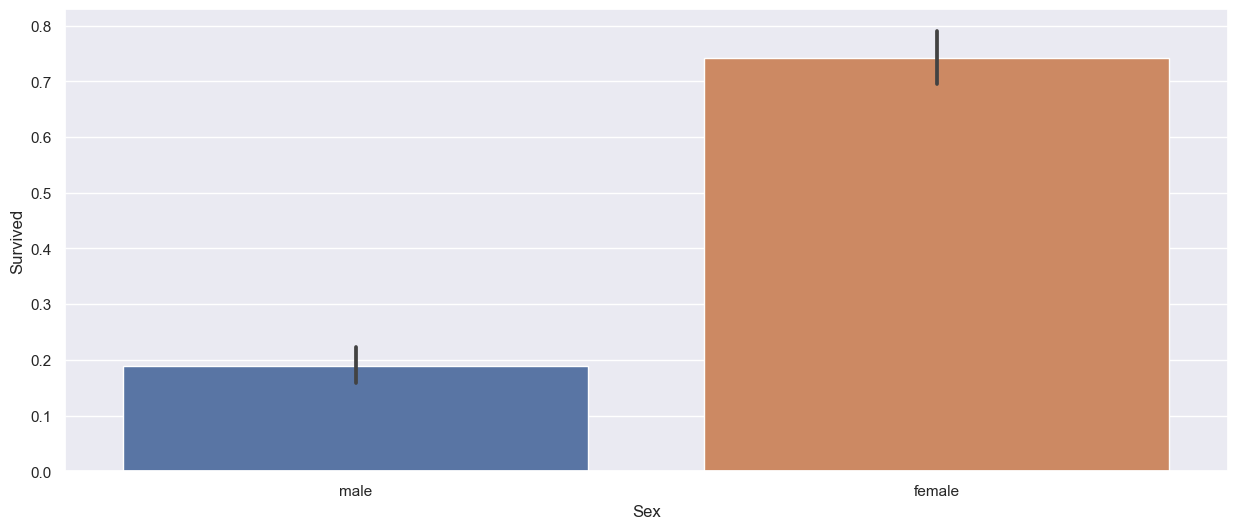

In [50]:
sns.barplot(x='Sex', y='Survived', data=train)


#index 0 Not Survived, 1 Survived
print('Percentage of Women who survived :', train[train['Sex'] == 'female']['Survived'].value_counts(normalize = True)[1]*100)
print('Percentage of Men who survived :', train[train['Sex'] == 'male']['Survived'].value_counts(normalize = True)[1]*100)

#### Conclusion: Chances of Survival for Female was high

Percentage of Pclass 1 who survived : 62.96296296296296
Percentage of Pclass 2 who survived : 47.28260869565217
Percentage of Pclass 3 who survived : 24.236252545824847


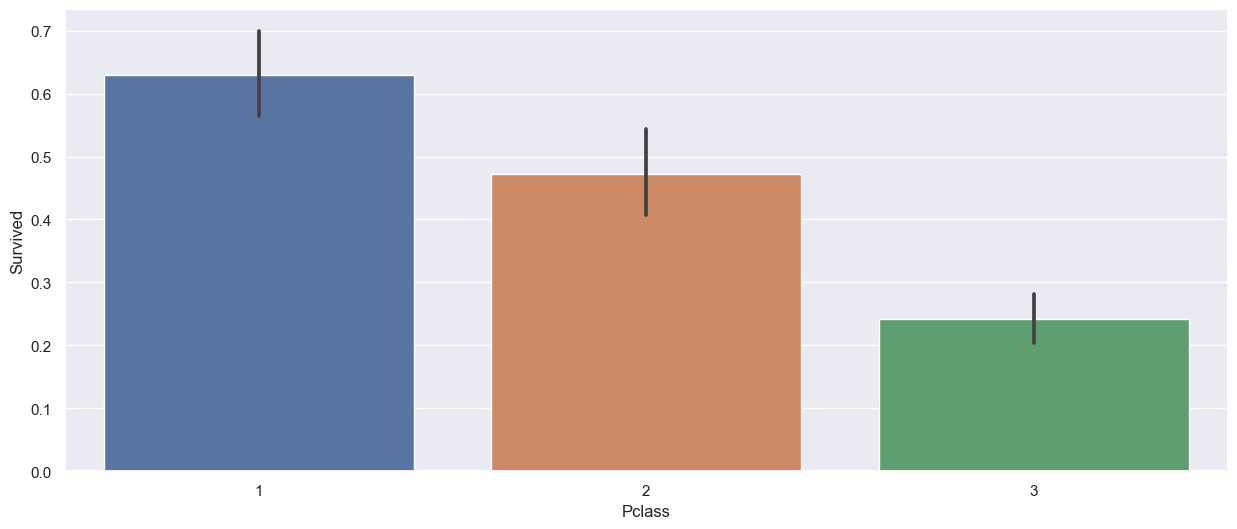

In [51]:
sns.barplot(x='Pclass', y='Survived', data=train)

print('Percentage of Pclass 1 who survived :', train[train['Pclass'] == 1]['Survived'].value_counts(normalize = True)[1]*100)
print('Percentage of Pclass 2 who survived :', train[train['Pclass'] == 2]['Survived'].value_counts(normalize = True)[1]*100)
print('Percentage of Pclass 3 who survived :', train[train['Pclass'] == 3]['Survived'].value_counts(normalize = True)[1]*100)

#### Conclusion: Chances of rich people surviving was high

In [52]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

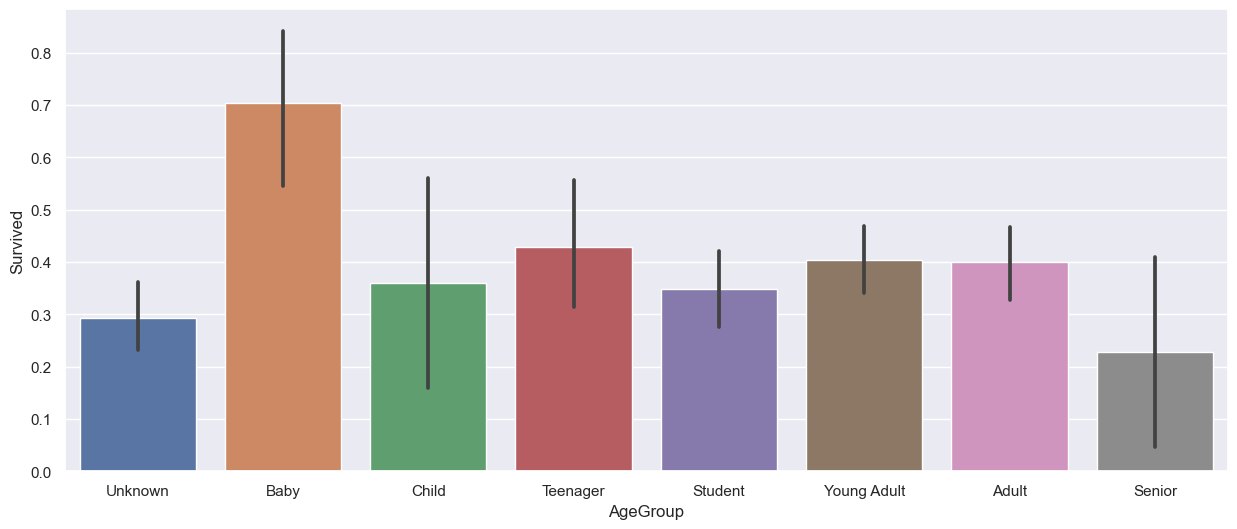

In [53]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
lables = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins, labels = lables)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = lables)

sns.set_theme(rc = {'figure.figsize' : (15,6)})
sns.barplot(x = 'AgeGroup', y = 'Survived', data = train)

In [54]:
print('Number of people embarking in Southampton (S):')
s = train[train['Embarked'] == 'S'].shape[0]
print(s)

print('Number of people embarking in Cherbourg (C):')
c = train[train['Embarked'] == 'C'].shape[0]
print(c)

print('Number of people embarking in Queenstown (Q):')
q = train[train['Embarked'] == 'Q'].shape[0]
print(q)


Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [55]:
train = train.fillna({'Embarked' : 'S'})

In [56]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [57]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [58]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [59]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt','Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [60]:
title_mapping = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Royal' : 5, 'Rare' : 6 }
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [61]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode()
miss_age = train[train['Title'] == 2]['AgeGroup'].mode()
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode()
master_age = train[train['Title'] == 4]['AgeGroup'].mode()
royal_age = train[train['Title'] == 5]['AgeGroup'].mode()
rare_age = train[train['Title'] == 6]['AgeGroup'].mode()

age_title_map = {1: 'Young Adult', 2: 'Student', 3 : 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

for i in range(len(train)):
    if(train['AgeGroup'][i] == 'Unknown'):
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]
        
for i in range(len(test)):
    if(test['AgeGroup'][i] == 'Unknown'):
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [62]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [63]:
from sklearn.preprocessing import LabelEncoder

transform = ['Sex','AgeGroup', 'Embarked']
le = LabelEncoder()
for i in transform:
    train[i] = le.fit_transform(train[[i]])

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,2,6,6
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,2,4,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,-0.5,1,2,2,4,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,0,6,1


In [65]:
for i in transform:
    test[i] = le.fit_transform(test[[i]])

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,3,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,6,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,4,3


### Finding Correlation between features

In [67]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.038062,-0.057527,-0.001652,0.013128,0.017260,0.010871
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.011497,-0.035322,0.081629,-0.167675,-0.124437,0.373139
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.360547,0.083081,0.018443,0.162098,0.233415,-0.184514
Sex,0.042939,-0.543351,0.131900,1.000000,0.024167,-0.114631,-0.245489,0.108262,0.140250,-0.453902
Age,0.038062,0.011497,-0.360547,0.024167,1.000000,-0.183470,-0.047017,0.084244,-0.402052,0.031691
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.183470,1.000000,0.414838,0.068230,-0.114544,0.245915
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.047017,0.414838,1.000000,0.039798,-0.242751,0.284756
Embarked,0.013128,-0.167675,0.162098,0.108262,0.084244,0.068230,0.039798,1.000000,0.019638,-0.059239
AgeGroup,0.017260,-0.124437,0.233415,0.140250,-0.402052,-0.114544,-0.242751,0.019638,1.000000,-0.340292
Title,0.010871,0.373139,-0.184514,-0.453902,0.031691,0.245915,0.284756,-0.059239,-0.340292,1.000000


<AxesSubplot:>

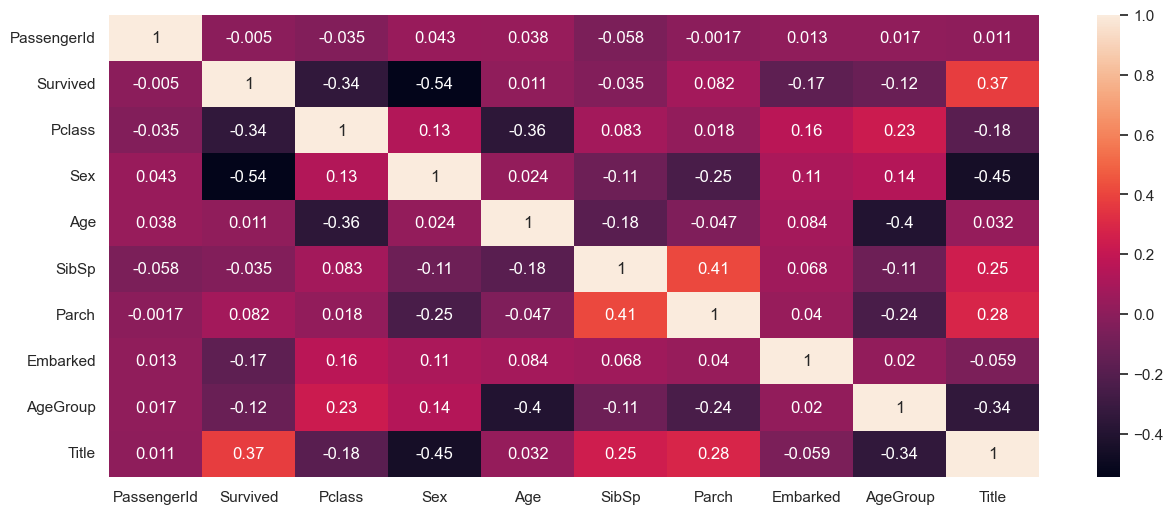

In [68]:
sns.heatmap(train.corr(), annot = True)

### Machine learning

#### LOGISTIC REGRESSION

In [69]:
x_train = train.drop(['PassengerId', 'Name', 'Survived'], axis=1)
y_train = train['Survived']

x_test= test.drop(['PassengerId','Name'], axis=1)


In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [71]:
predictions = lr.predict(x_test)

In [72]:
ids = test['PassengerId']
output = pd.DataFrame({'PassengerId' : ids, 'Survived' : predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Decision tree

In [73]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)
dt_pred = dtr.predict(x_test)

### Support Vector Machine

In [74]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

sv_pred = regressor.predict(x_test)

### Comparing the Models

In [75]:
result = pd.read_csv(r'D:\data analysis\GFG Data Science\pandas\gender_submission.csv')

Logistic Regression

In [76]:
from sklearn.metrics import mean_squared_error

cost= mean_squared_error(result['Survived'], output['Survived'])
cost

0.0430622009569378

Decision Tree

In [77]:
cost2= mean_squared_error(result['Survived'], dt_pred)
cost2

0.19688797255358556

Support Vector Machine

In [78]:
cost3= mean_squared_error(result['Survived'], sv_pred)
cost3

0.1136748148621176

<AxesSubplot:xlabel='model', ylabel='cost'>

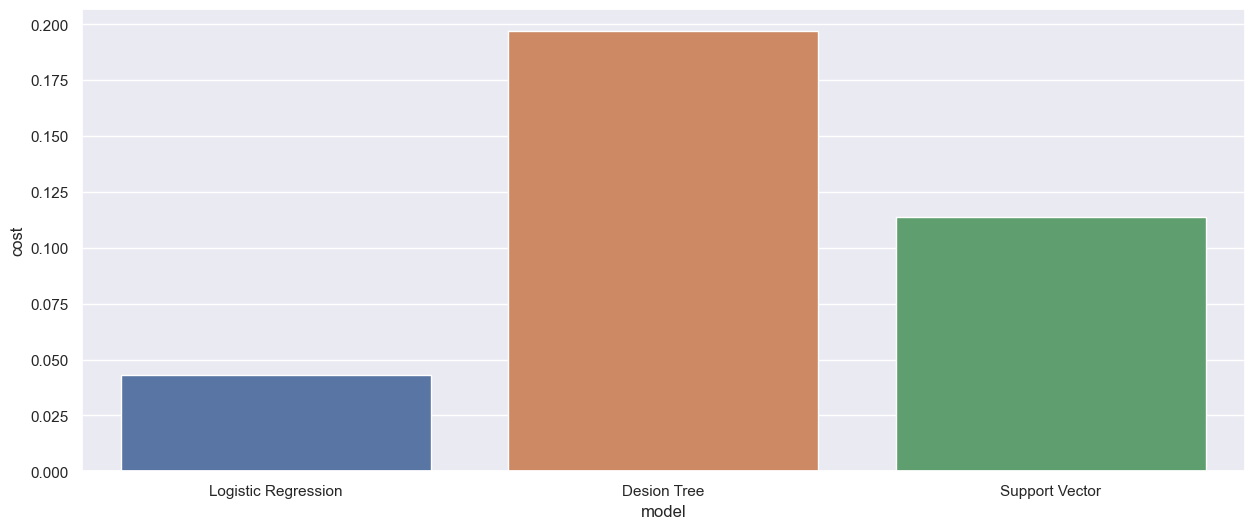

In [79]:
out=pd.DataFrame({'model':['Logistic Regression','Desion Tree','Support Vector'], 'cost':[cost,cost2,cost3]})
sns.barplot(x=out['model'], y=out['cost'])

### Percentage Success

In [80]:
count = 0
for i in range(len(output['Survived'])):
    if output['Survived'][i] == result['Survived'][i]:
        count+=1
print('Percentage success :', count/len(output)*100)

Percentage success : 95.69377990430623
